# Human Acitivites Recognition Datasets(HAR Datasets)
## Multi-label classification problem

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

### Y_labels

In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

WALKING as 1
WALKING_UPSTAIRS as 2
WALKING_DOWNSTAIRS as 3
SITTING as 4
STANDING as 5
LAYING as 6

### Quick overview of the dataset :
Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

Walking
WalkingUpstairs
WalkingDownstairs
Standing
Sitting
Lying.
Readings are divided into a window of 2.56 seconds with 50% overlapping.

Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x,y and z components each.

Gyroscope readings are the measure of angular velocities which has x,y and z components.

Jerk signals are calculated for BodyAcceleration readings.

Fourier Transforms are made on the above time readings to obtain frequency readings.

Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

We get a feature vector of 561 features and these features are given in the dataset.

Each window of readings is a datapoint of 561 features.

In [2]:
# Install Dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras hyperopt hyperas ipykernel

In [23]:
# import Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Extracting feature name 

In [12]:
# get the features from the file features.txt
data_path= os.path.join(os.getcwd(), 'datasets', 'UCI_HAR_Dataset', 'UCI_HAR_Dataset')

# get the features from the file features.txt
features = list()
with open(os.path.join(data_path, 'features.txt')) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))        

No of Features: 561


### Obtain the train data

In [15]:
# get the data from txt files to pandas dataframe
X_train= pd.read_csv(os.path.join(data_path, 'train' , 'X_train.txt'), delim_whitespace=True, header=None) # delim_whitespace: 공백으로 구분 된 값으로 파일 읽기
X_train.columns= features
X_train['subject']= pd.read_csv(os.path.join(data_path, 'train', 'subject_train.txt'), header=None, squeeze=True) # add subject column to the dataframe

y_train= pd.read_csv(os.path.join(data_path, 'train', 'y_train.txt'), names=['Activity'], squeeze=True) #squeeze: DataFrame을 단일 칼럼으로 반환
y_train_labels= y_train.map({1: 'WALKING', 
                             2: 'WALKING_UPSTAIRS',
                             3: 'WALKING_DOWNSTAIRS',
                             4:'SITTING',
                             5:'STANDING',
                             6:'LAYING'})

# put all columns in a single dataframe
train= X_train
train['Activity']= y_train
train['ActivityName']= y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1552,0.278324,-0.017606,-0.100195,-0.22601,0.304974,0.169276,-0.21815,0.238542,0.117017,0.010742,...,-0.044582,-0.177588,0.176441,-0.931856,-0.844271,0.205654,0.011582,7,1,WALKING


### Obtain the test data

In [17]:
X_test= pd.read_csv(os.path.join(data_path, 'test', 'X_test.txt'), delim_whitespace=True, header=None)
X_test.columns= features
X_test['subject']= pd.read_csv(os.path.join(data_path, 'test', 'subject_test.txt'), header=None, squeeze=True)
y_test= pd.read_csv(os.path.join(data_path, 'test', 'y_test.txt'), names=['Activity'], squeeze=True)
y_test_labels= y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                    4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test= X_test
test['Activity']= y_test
test['ActivityName']= y_test_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1213,0.294567,-0.017789,-0.113509,-0.980403,-0.979168,-0.974744,-0.981406,-0.980107,-0.981615,-0.922638,...,0.199578,0.361462,0.381229,-0.335586,0.62783,-0.695767,-0.302516,6,6,LAYING


In [18]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

## Data Cleaning
### 1. check for Duplicates

In [19]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for missing values

In [20]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


### 3. Checking for data imbalance

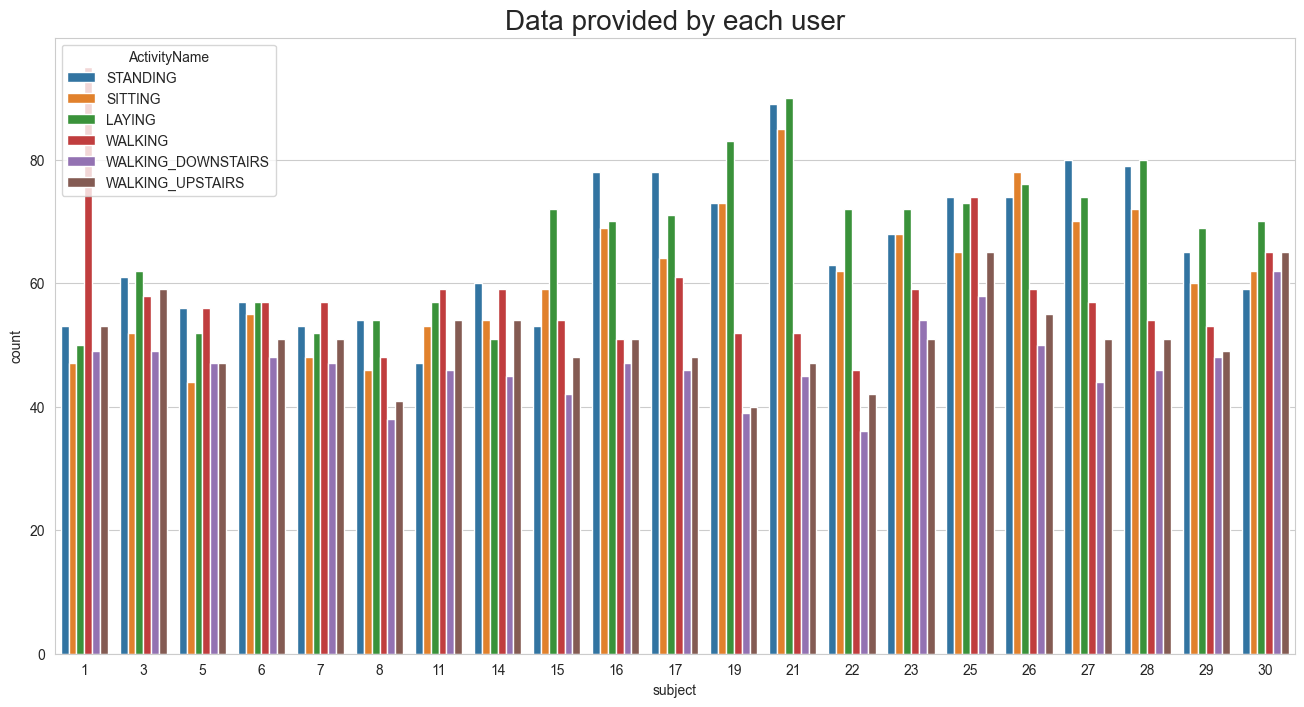

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

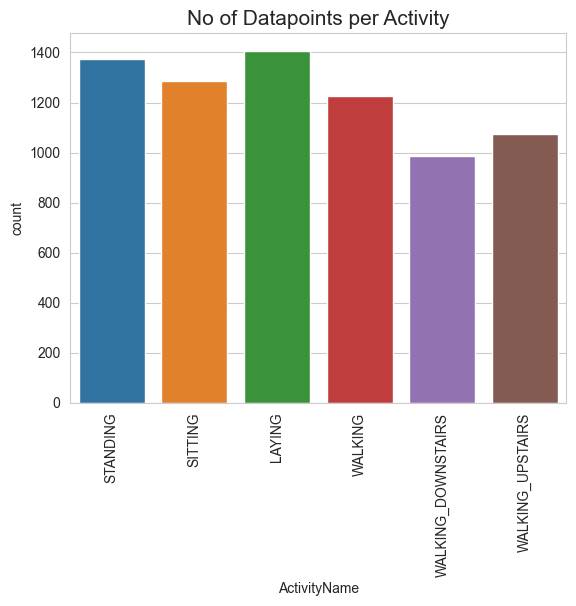

In [26]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x= 'ActivityName', data= train)
plt.xticks(rotation=90)
plt.show()

### Observation
Data is "largely" well balanced.

### 4. changing feature names

In [31]:
# changing feature names
columns= train.columns
# Removing '()' from column names
columns = columns.str.replace('[()]','').str.replace('[-]', '_').str.replace('[,]','')

train.columns = columns
test.columns = columns
test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

### 5. save the dataframe in a csv file

In [32]:
train.to_csv(os.path.join('src', 'data','train.csv'), index=False)
test.to_csv(os.path.join('src', 'data','test.csv'), index=False)